# STC Jawwy

In [44]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb
!pip install pandas
!pip install statsmodels

In [45]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm



# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [46]:
dataframe = pd.read_excel("stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   

df=dataframe.copy()

In [47]:
# check the data shape
df.shape

(86, 2)

In [48]:
# display the first 5 rows 
df.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [49]:
# display the dataset after applying data types
df.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [50]:
# describe the numeric values in the dataset
df.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [51]:
# check if any column has null value in the dataset
df.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [52]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [53]:
# Setting the date as index
df.set_index('date_', inplace=True)

In [54]:
# Display the dataframe after setting the date as index
df.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [55]:
# show the dataframe
fig = px.line(df,  y="Total_watch_time_in_houres")
fig.show()

In [56]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""
# check for stationarity using the Dickey-Fuller test
# Perform grid search to determine optimal SARIMA parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f"Best SARIMA parameters: {best_pdq} x {best_seasonal_pdq} AIC={best_aic:.2f}")



c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-

Best SARIMA parameters: (0, 1, 1) x (1, 1, 1, 12) AIC=721.67


Fit the SARIMA model to the data

In [57]:
# Fit the SARIMA model to the data
mod = sm.tsa.statespace.SARIMAX(df, order=best_pdq, seasonal_order=best_seasonal_pdq, enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



Generate predictions for the next two months

In [58]:
# Generate predictions for the next two months
forecast_start_date = df.index[-1] + pd.DateOffset(days=1)
forecast_end_date = forecast_start_date + pd.DateOffset(months=2)
forecast = results.predict(start=forecast_start_date, end=forecast_end_date, dynamic=False)

print(forecast)

2018-05-01    605.060347
2018-05-02    651.284554
2018-05-03    635.900265
2018-05-04    656.104019
2018-05-07    571.700573
2018-05-08    619.462113
2018-05-09    565.150642
2018-05-10    616.801474
2018-05-11    638.479298
2018-05-14    643.768209
2018-05-15    592.994150
2018-05-16    591.675287
2018-05-17    594.195991
2018-05-18    607.894912
2018-05-21    618.794159
2018-05-22    574.956238
2018-05-23    523.255003
2018-05-24    591.671254
2018-05-25    545.136957
2018-05-28    574.952329
2018-05-29    589.173478
2018-05-30    600.542440
2018-05-31    542.687093
2018-06-01    544.136262
2018-06-04    544.551218
2018-06-05    568.408819
2018-06-06    571.098883
2018-06-07    547.263210
2018-06-08    485.348036
2018-06-11    547.313165
2018-06-12    498.349810
2018-06-13    534.985089
2018-06-14    551.535195
2018-06-15    561.005164
2018-06-18    505.361528
2018-06-19    505.946152
2018-06-20    507.018801
2018-06-21    527.703523
2018-06-22    532.957576
2018-06-25    502.874565


Plot the forecast

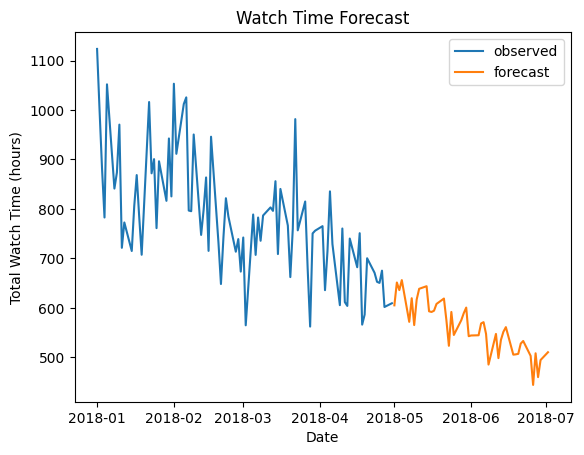

In [59]:
# Plot the forecast
plt.plot(df.index, df, label='observed')
plt.plot(forecast.index, forecast, label='forecast')
plt.title('Watch Time Forecast')
plt.xlabel('Date')
plt.ylabel('Total Watch Time (hours)')
plt.legend()
plt.show()